In [245]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
data=pd.read_csv(r"C:\Users\Hp\Documents\DA-sample\Applicant-details.csv")
data

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,11,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6266,156398,69,10,single,rented,yes,Technology_specialist,Bathinda,Punjab,7,14,0
99996,54887,1900922,69,11,single,rented,no,Mechanical_engineer,Erode[17],Tamil_Nadu,5,10,0
99997,76821,654295936,66,11,single,owned,no,Comedian,Gandhinagar,Gujarat,11,14,0
99998,861,4505937,52,6,single,rented,no,Petroleum_Engineer,Mangalore,Karnataka,6,14,0


In [3]:
data.shape

(100000, 13)

In [4]:
data.drop_duplicates(inplace=True)
data.shape

(100000, 13)

In [5]:
A_ID=data["Applicant_ID"]
R_city=data["Residence_City"]

In [6]:
data=data.drop(["Applicant_ID"],axis=1)
data=data.drop(["Residence_City"],axis=1)
data.shape

(100000, 11)

In [7]:
data=data.rename(columns={"Vehicle_Ownership(car)":"Car_Ownership"})

In [8]:
data.columns

Index(['Annual_Income', 'Applicant_Age', 'Work_Experience', 'Marital_Status',
       'House_Ownership', 'Car_Ownership', 'Occupation', 'Residence_State',
       'Years_in_Current_Employment', 'Years_in_Current_Residence',
       'Loan_Default_Risk'],
      dtype='object')

In [9]:
data.isnull().sum()

Annual_Income                  0
Applicant_Age                  0
Work_Experience                0
Marital_Status                 0
House_Ownership                0
Car_Ownership                  0
Occupation                     0
Residence_State                0
Years_in_Current_Employment    0
Years_in_Current_Residence     0
Loan_Default_Risk              0
dtype: int64

In [10]:
data.dtypes

Annual_Income                   int64
Applicant_Age                   int64
Work_Experience                 int64
Marital_Status                 object
House_Ownership                object
Car_Ownership                  object
Occupation                     object
Residence_State                object
Years_in_Current_Employment     int64
Years_in_Current_Residence      int64
Loan_Default_Risk               int64
dtype: object

In [11]:
data.Marital_Status=le.fit_transform(data.Marital_Status)
data.House_Ownership=le.fit_transform(data.House_Ownership)
data.Car_Ownership=le.fit_transform(data.Car_Ownership)
data.Occupation=le.fit_transform(data.Occupation)
data.Residence_State=le.fit_transform(data.Residence_State)

In [12]:
data.dtypes

Annual_Income                  int64
Applicant_Age                  int64
Work_Experience                int64
Marital_Status                 int32
House_Ownership                int32
Car_Ownership                  int32
Occupation                     int32
Residence_State                int32
Years_in_Current_Employment    int64
Years_in_Current_Residence     int64
Loan_Default_Risk              int64
dtype: object

In [13]:
data.columns

Index(['Annual_Income', 'Applicant_Age', 'Work_Experience', 'Marital_Status',
       'House_Ownership', 'Car_Ownership', 'Occupation', 'Residence_State',
       'Years_in_Current_Employment', 'Years_in_Current_Residence',
       'Loan_Default_Risk'],
      dtype='object')

In [14]:
data.head()

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Car_Ownership,Occupation,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,9657655,76,0,1,2,0,40,19,0,12,0
1,9259353,37,18,1,2,0,36,28,12,11,0
2,1509721,66,8,1,2,0,19,13,4,11,0
3,5867312,43,1,1,1,0,7,0,1,13,1
4,7223191,44,9,1,2,0,0,28,9,13,0


# Visualization

<Axes: xlabel='Annual_Income', ylabel='Work_Experience'>

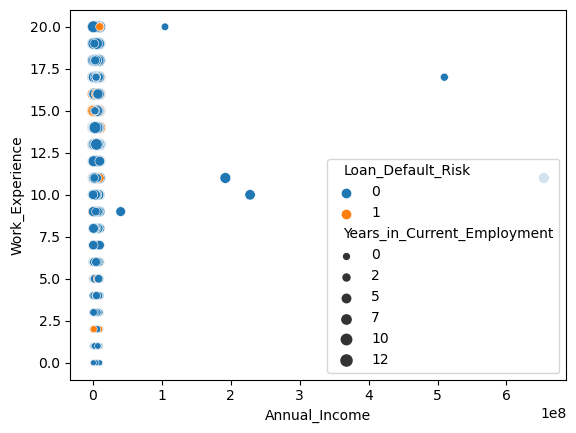

In [15]:
sns.scatterplot(x="Annual_Income",y="Work_Experience",hue="Loan_Default_Risk",size="Years_in_Current_Employment",data=data)

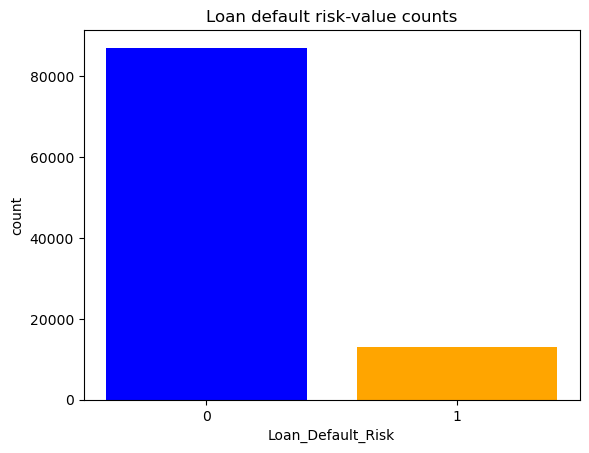

In [228]:
counts=data['Loan_Default_Risk'].value_counts()
colors=['blue','orange']
plt.bar(counts.index, counts.values, color=colors)
plt.xlabel('Loan_Default_Risk')
plt.ylabel('count')
plt.title('Loan default risk-value counts')
plt.xticks([0,1],['0','1'])
plt.show()

In [16]:
#graph is plotted between annual income and work experience.
#orange color indicates the loan default risk and blue indicates no risk

<Axes: xlabel='Loan_Default_Risk', ylabel='Work_Experience'>

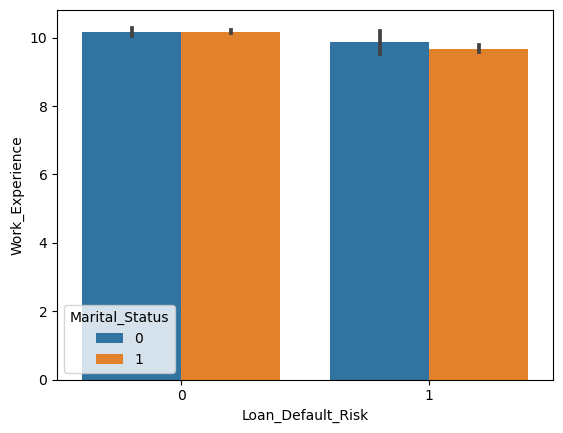

In [17]:
sns.barplot(x="Loan_Default_Risk",y="Work_Experience",hue="Marital_Status",data=data)

In [18]:
data.Loan_Default_Risk.value_counts()

Loan_Default_Risk
0    87003
1    12997
Name: count, dtype: int64

In [19]:
#graph plotted between loan default risk and work experience
#blue color indicates not married and orange indicates married

<Axes: xlabel='Residence_State', ylabel='Density'>

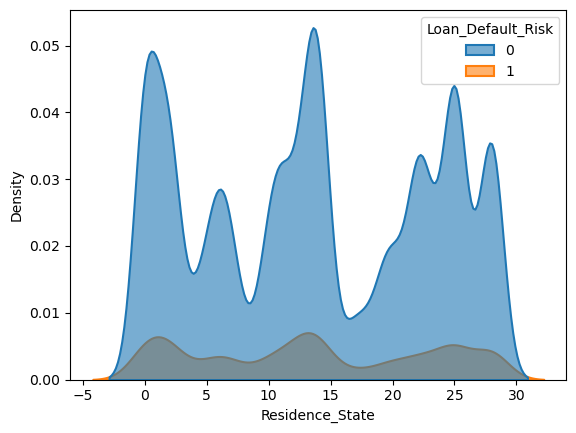

In [20]:
sns.kdeplot(data=data,x="Residence_State",hue="Loan_Default_Risk",fill=True,alpha=0.6,linewidth=1.5)

In [21]:
#the graph is plotted based on residence state
#orange and blue shows loan default risk

In [22]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=90)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80000, 10), (20000, 10), (80000,), (20000,))

# Logistic regression

In [25]:
lg.fit(x_train,y_train)

LogisticRegression()

In [26]:
lg_p=lg.predict(x_test)
lg_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
pred_prob=lg.predict_proba(x_test)
pred_prob

array([[0.86447882, 0.13552118],
       [0.51274099, 0.48725901],
       [0.93610638, 0.06389362],
       ...,
       [0.81347698, 0.18652302],
       [0.85661391, 0.14338609],
       [0.93999537, 0.06000463]])

In [28]:
lg_m=confusion_matrix(lg_p,y_test)
lg_m

array([[17416,  2584],
       [    0,     0]], dtype=int64)

In [29]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

87.08

In [30]:
lg_tpr=1
lg_fpr=1
lg_sp=0
lg_pr=0.87
lg_f1=0.93

In [31]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     20000
           1       0.00      0.00      0.00         0

    accuracy                           0.87     20000
   macro avg       0.50      0.44      0.47     20000
weighted avg       1.00      0.87      0.93     20000



In [32]:
y_test.value_counts()

Loan_Default_Risk
0    17416
1     2584
Name: count, dtype: int64

In [33]:
df=pd.DataFrame(pred_prob)
df

,0,1
0,0.864479,0.135521
1,0.512741,0.487259
2,0.936106,0.063894
3,0.803106,0.196894
4,0.869018,0.130982
...,...,...
19995,0.735117,0.264883
19996,0.672840,0.327160
19997,0.813477,0.186523
19998,0.856614,0.143386


In [34]:
fpr,tpr,threshold=roc_curve(y_test,df.iloc[:,1])
fpr

array([0.00000000e+00, 1.72255397e-04, 1.72255397e-04, ...,
       9.99598071e-01, 9.99885163e-01, 1.00000000e+00])

In [35]:
tpr

array([0.        , 0.        , 0.00116099, ..., 1.        , 1.        ,
       1.        ])

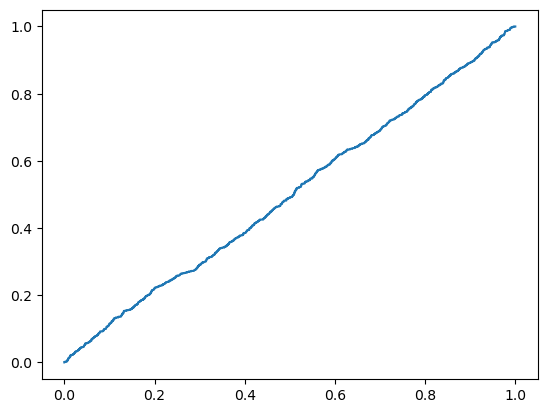

In [36]:
plt.plot(fpr,tpr)

In [37]:
#PRC

In [38]:
precision,recall,threshold=precision_recall_curve(y_test,df.iloc[:,1])

In [39]:
precision

array([0.1292    , 0.12921292, 0.12924524, ..., 0.5       , 0.        ,
       1.        ])

In [40]:
recall

array([1.        , 1.        , 1.        , ..., 0.00116099, 0.        ,
       0.        ])

Text(0.5, 1.0, 'PRC-CURVE')

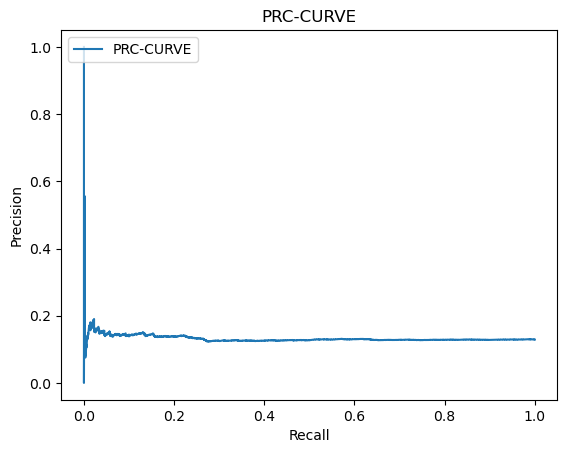

In [41]:
plt.plot(recall,precision,label="PRC-CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-CURVE")

# Decision tree 

In [42]:
dt=DecisionTreeClassifier()

In [43]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
dt_p=dt.predict(x_test)
dt_p

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [45]:
dt_m=confusion_matrix(dt_p,y_test)
dt_m

array([[16531,   455],
       [  885,  2129]], dtype=int64)

In [46]:
dt_acc=dt_m.diagonal().sum()/dt_m.sum()*100
dt_acc

93.30000000000001

In [47]:
dt_tpr=0.949
dt_fpr=0.176
dt_sp=0.823
dt_pr=0.973
dt_f1=0.96

In [48]:
dt.feature_importances_

array([0.24025108, 0.16572033, 0.09129771, 0.01527875, 0.01241301,
       0.00529272, 0.18443235, 0.13315705, 0.07909033, 0.07306668])

In [49]:
dt1=pd.DataFrame({"importances":list(dt.feature_importances_),"columns":list(x)})
dt1

,importances,columns
0,0.240251,Annual_Income
1,0.165720,Applicant_Age
2,0.091298,Work_Experience
3,0.015279,Marital_Status
4,0.012413,House_Ownership
5,0.005293,Car_Ownership
6,0.184432,Occupation
7,0.133157,Residence_State
8,0.079090,Years_in_Current_Employment
9,0.073067,Years_in_Current_Residence


In [50]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     16986
           1       0.82      0.71      0.76      3014

    accuracy                           0.93     20000
   macro avg       0.89      0.84      0.86     20000
weighted avg       0.93      0.93      0.93     20000



In [51]:
roc1=roc_auc_score(dt_p,y_test)
roc1

0.8397917532460278

In [52]:
dt_df=pd.DataFrame(dt_p)
dt_df

,0
0,1
1,0
2,1
3,0
4,0
...,...
19995,0
19996,0
19997,1
19998,0


In [53]:
fpr,tpr,threshold=roc_curve(y_test,dt_df)
fpr

array([0.        , 0.05081534, 1.        ])

In [54]:
tpr

array([0.        , 0.82391641, 1.        ])

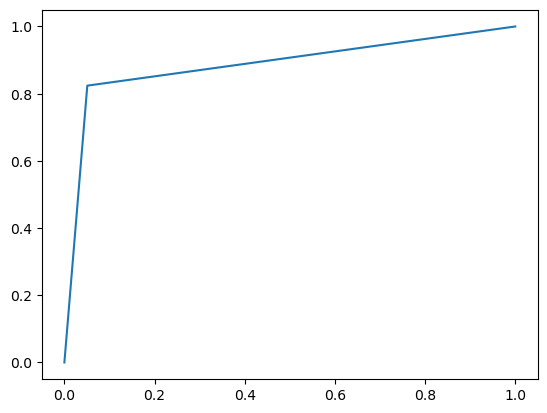

In [55]:
plt.plot(fpr,tpr)

In [56]:
#PRC

In [57]:
precision,recall,threshold=precision_recall_curve(y_test,dt_df)
precision

array([0.1292    , 0.70637027, 1.        ])

In [58]:
recall

array([1.        , 0.82391641, 0.        ])

Text(0.5, 1.0, 'PRC-CURVE')

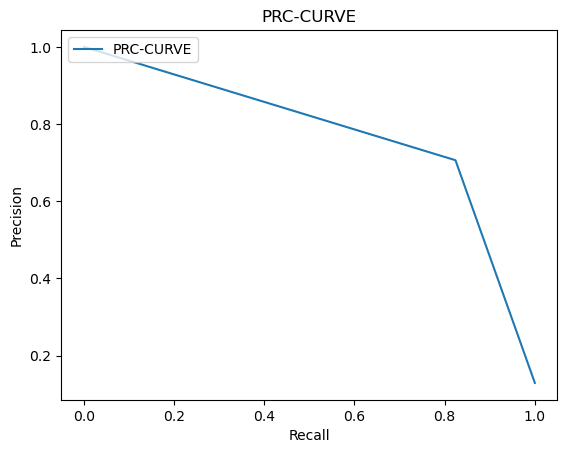

In [59]:
plt.plot(recall,precision,label="PRC-CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-CURVE")

# Random forest

In [60]:
rf=RandomForestClassifier()

In [61]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
rf_p=rf.predict(x_test)
rf_p

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [63]:
rf_m=confusion_matrix(rf_p,y_test)
rf_m

array([[16489,   404],
       [  927,  2180]], dtype=int64)

In [64]:
rf_acc=rf_m.diagonal().sum()/rf_m.sum()*100
rf_acc

93.345

In [65]:
rf_tpr=0.946
rf_fpr=0.146
rf_sp=0.853
rf_pr=0.977
rf_f1=0.96

In [66]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     16893
           1       0.84      0.70      0.77      3107

    accuracy                           0.93     20000
   macro avg       0.90      0.84      0.86     20000
weighted avg       0.93      0.93      0.93     20000



# KNN

In [67]:
knn=KNeighborsClassifier()

In [68]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [69]:
knn_p=knn.predict(x_test)

In [70]:
knn_m=confusion_matrix(knn_p,y_test)
knn_m

array([[16531,   524],
       [  885,  2060]], dtype=int64)

In [71]:
knn_acc=knn_m.diagonal().sum()/knn_m.sum()*100
knn_acc

92.955

In [72]:
knn_tpr=0.949
knn_fpr=0.202
knn_sp=0.797
knn_pr=0.969
knn_f1=0.958

In [73]:
print(classification_report(knn_p,y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17055
           1       0.80      0.70      0.75      2945

    accuracy                           0.93     20000
   macro avg       0.87      0.83      0.85     20000
weighted avg       0.93      0.93      0.93     20000



In [74]:
lst=list()

In [75]:
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    p=knn.predict(x_test)
    c=confusion_matrix(p,y_test)
    acc=c.diagonal().sum()/c.sum()*100
    lst.append(acc)

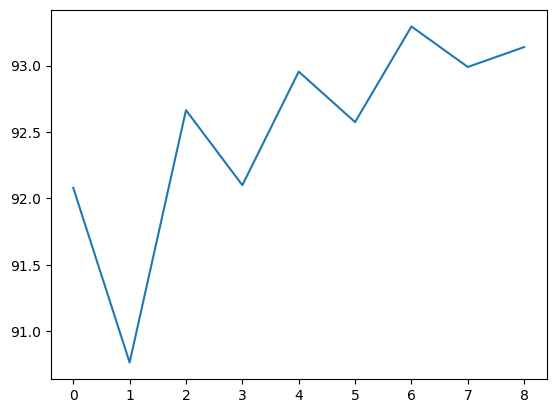

In [76]:
p1=plt.plot(lst)

# Naive bayes

In [77]:
nb=MultinomialNB()

In [78]:
nb.fit(x_train,y_train)

MultinomialNB()

In [79]:
nb_p=nb.predict(x_test)

In [80]:
nb_m=confusion_matrix(nb_p,y_test)
nb_m

array([[17416,  2584],
       [    0,     0]], dtype=int64)

In [81]:
nb_acc=nb_m.diagonal().sum()/nb_m.sum()*100
nb_acc

87.08

In [82]:
nb_tpr=1
nb_fpr=1
nb_sp=0
nb_pr=0.87
nb_f1=0.93

In [83]:
print(classification_report(nb_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     20000
           1       0.00      0.00      0.00         0

    accuracy                           0.87     20000
   macro avg       0.50      0.44      0.47     20000
weighted avg       1.00      0.87      0.93     20000



# SVM

In [84]:
svc=SVC()

In [85]:
svc.fit(x_train,y_train)

SVC()

In [86]:
svc_p=svc.predict(x_test)

In [87]:
svc_m=confusion_matrix(svc_p,y_test)
svc_m

array([[17416,  2584],
       [    0,     0]], dtype=int64)

In [88]:
svc_acc=svc_m.diagonal().sum()/svc_m.sum()*100
svc_acc

87.08

In [89]:
svc_tpr=1
svc_fpr=1
svc_sp=0
svc_pr=0.87
svc_f1=0.931

In [90]:
print(classification_report(svc_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     20000
           1       0.00      0.00      0.00         0

    accuracy                           0.87     20000
   macro avg       0.50      0.44      0.47     20000
weighted avg       1.00      0.87      0.93     20000



In [91]:
l1=["Logistic","Decision_tree","Random_forest","KNN", "Naive_bayes", "SVM"]
l2=[lg_acc,dt_acc,rf_acc, knn_acc, nb_acc,svc_acc]
l3=[lg_tpr,dt_tpr,rf_tpr, knn_tpr, nb_tpr,svc_tpr]
l4=[lg_fpr,dt_fpr,rf_fpr, knn_fpr, nb_fpr, svc_fpr]
l5=[lg_sp,dt_sp,rf_sp, knn_sp, nb_sp, svc_sp]
l6=[lg_pr,dt_pr,rf_pr, knn_pr, nb_pr, svc_pr]
l7=[lg_f1,dt_f1,rf_f1, knn_f1, nb_f1,svc_f1]

In [92]:
final=pd.DataFrame({"Modelname":l1,"Accuracy":l2,"TPR":l3,"FPR":l4, "Specificity":l5,"Precision":l6,"F1-score":l7})
final

,Modelname,Accuracy,TPR,FPR,Specificity,Precision,F1-score
0,Logistic,87.080,1.000,1.000,0.000,0.870,0.930
1,Decision_tree,93.300,0.949,0.176,0.823,0.973,0.960
2,Random_forest,93.345,0.946,0.146,0.853,0.977,0.960
3,KNN,92.955,0.949,0.202,0.797,0.969,0.958
4,Naive_bayes,87.080,1.000,1.000,0.000,0.870,0.930
5,SVM,87.080,1.000,1.000,0.000,0.870,0.931


# XG Boost

In [93]:
xgb=XGBClassifier()

In [94]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [95]:
xgb_p=xgb.predict(x_test)

In [96]:
xgb_m=confusion_matrix(xgb_p,y_test)
xgb_m

array([[16971,  1280],
       [  445,  1304]], dtype=int64)

In [97]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

91.375

In [98]:
xgb_tpr=0.974
xgb_fpr=0.495
xgb_sp=0.504
xgb_pr=0.929
xgb_f1=0.95

In [99]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     18251
           1       0.50      0.75      0.60      1749

    accuracy                           0.91     20000
   macro avg       0.74      0.84      0.78     20000
weighted avg       0.93      0.91      0.92     20000



# Adaboost

In [100]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [101]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [102]:
adb_p=adbo.predict(x_test)

In [103]:
adb_m=confusion_matrix(adb_p,y_test)
adb_m

array([[16530,   455],
       [  886,  2129]], dtype=int64)

In [104]:
adb_acc=adb_m.diagonal().sum()/adb_m.sum()*100
adb_acc

93.29499999999999

In [105]:
adb_tpr=0.949
adb_fpr=0.176
adb_sp=0.823
adb_pr=0.973
adb_f1=0.960

In [106]:
print(classification_report(adb_p,y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     16985
           1       0.82      0.71      0.76      3015

    accuracy                           0.93     20000
   macro avg       0.89      0.84      0.86     20000
weighted avg       0.93      0.93      0.93     20000



In [107]:
l1=["Logistic","Decision_tree","Random_forest","KNN", "Naive_bayes", "SVM", "XG Boost", "Adaboost"]
l2=[lg_acc,dt_acc,rf_acc, knn_acc, nb_acc,svc_acc,xgb_acc, adb_acc]
l3=[lg_tpr,dt_tpr,rf_tpr, knn_tpr, nb_tpr,svc_tpr, xgb_tpr, adb_tpr]
l4=[lg_fpr,dt_fpr,rf_fpr, knn_fpr, nb_fpr, svc_fpr, xgb_fpr, adb_fpr]
l5=[lg_sp,dt_sp,rf_sp, knn_sp, nb_sp, svc_sp, xgb_sp, adb_sp]
l6=[lg_pr,dt_pr,rf_pr, knn_pr, nb_pr, svc_pr, xgb_pr, adb_pr]
l7=[lg_f1,dt_f1,rf_f1, knn_f1, nb_f1,svc_f1, xgb_f1, adb_f1]

In [108]:
final=pd.DataFrame({"Modelname":l1,"Accuracy":l2,"TPR":l3,"FPR":l4, "Specificity":l5,"Precision":l6,"F1-score":l7})
final

,Modelname,Accuracy,TPR,FPR,Specificity,Precision,F1-score
0,Logistic,87.080,1.000,1.000,0.000,0.870,0.930
1,Decision_tree,93.300,0.949,0.176,0.823,0.973,0.960
2,Random_forest,93.345,0.946,0.146,0.853,0.977,0.960
3,KNN,92.955,0.949,0.202,0.797,0.969,0.958
4,Naive_bayes,87.080,1.000,1.000,0.000,0.870,0.930
5,SVM,87.080,1.000,1.000,0.000,0.870,0.931
6,XG Boost,91.375,0.974,0.495,0.504,0.929,0.950
7,Adaboost,93.295,0.949,0.176,0.823,0.973,0.960


# Class imbalance treatment

In [109]:
data.Loan_Default_Risk.value_counts()

Loan_Default_Risk
0    87003
1    12997
Name: count, dtype: int64

In [110]:
smote=SMOTE()

In [111]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [112]:
x_sm,y_sm=smote.fit_resample(x,y)

In [113]:
x_sm.shape,y_sm.shape

((174006, 10), (174006,))

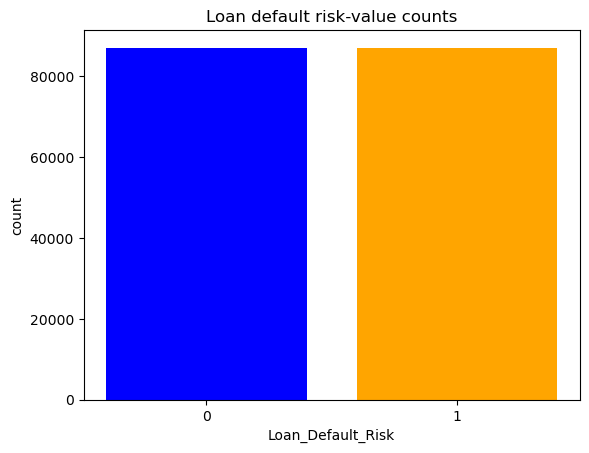

In [239]:
counts=y_sm.value_counts()
colors=['blue','orange']
plt.bar(counts.index, counts.values, color=colors)
plt.xlabel('Loan_Default_Risk')
plt.ylabel('count')
plt.title('Loan default risk-value counts')
plt.xticks([0,1],['0','1'])
plt.show()

# Outlier treatment

<Axes: >

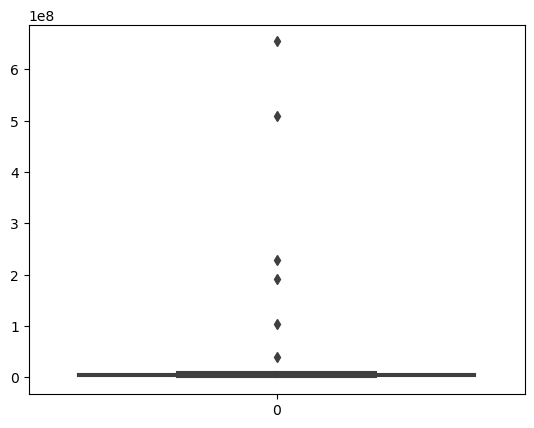

In [114]:
sns.boxplot(x_sm["Annual_Income"])

<Axes: xlabel='Annual_Income', ylabel='Density'>

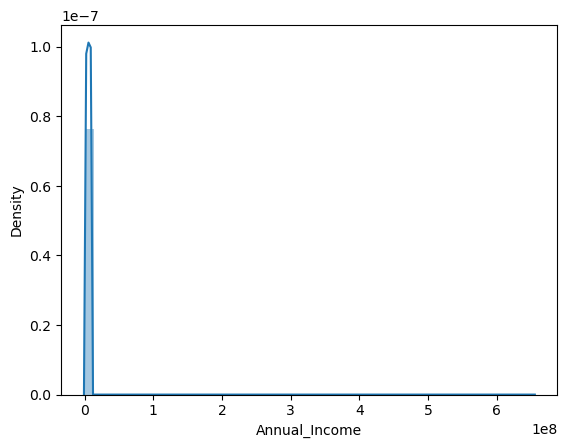

In [115]:
sns.distplot(x_sm["Annual_Income"])

In [116]:
IQR=x_sm["Annual_Income"].quantile(0.75)-x_sm["Annual_Income"].quantile(0.25)
IQR

5040601.0

In [117]:
lb1=x_sm["Annual_Income"].quantile(0.25)-(IQR*3)
ub1=x_sm["Annual_Income"].quantile(0.75)+(IQR*3)
print(lb1,ub1)

-12646965.0 22637242.0


In [118]:
x_sm.loc[x_sm["Annual_Income"]>22382831.0,"Annual_Income"]=22382831.0

<Axes: xlabel='Annual_Income', ylabel='Density'>

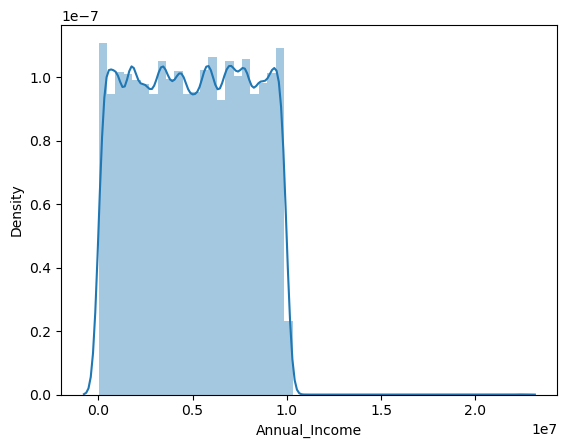

In [119]:
sns.distplot(x_sm["Annual_Income"])

<Axes: >

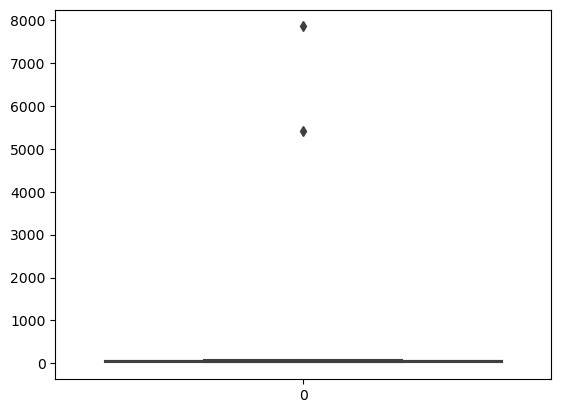

In [120]:
sns.boxplot(x_sm["Applicant_Age"])

In [121]:
x_sm.Applicant_Age.describe()

count    174006.000000
mean         49.642627
std          28.465347
min          21.000000
25%          34.000000
50%          49.000000
75%          65.000000
max        7853.000000
Name: Applicant_Age, dtype: float64

(array([1.74004e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  21. ,  804.2, 1587.4, 2370.6, 3153.8, 3937. , 4720.2, 5503.4,
        6286.6, 7069.8, 7853. ]),
 <BarContainer object of 10 artists>)

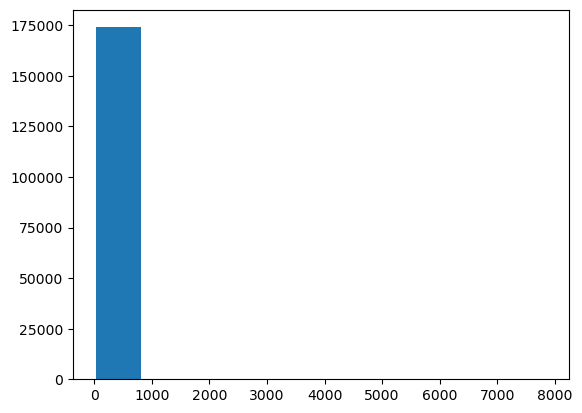

In [122]:
#sns.histplot(x_sm["Applicant_Age"])
plt.hist(x_sm["Applicant_Age"])

<Axes: xlabel='Applicant_Age', ylabel='Density'>

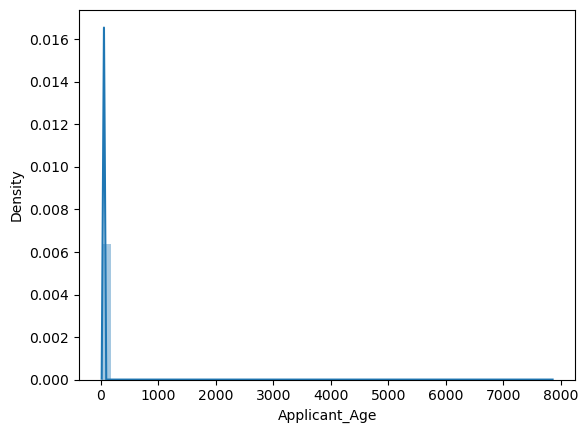

In [123]:
sns.distplot(x_sm["Applicant_Age"])

In [124]:
IQR=x_sm["Applicant_Age"].quantile(0.75)-x_sm["Applicant_Age"].quantile(0.25)
IQR

31.0

In [125]:
lb1=x_sm["Applicant_Age"].quantile(0.25)-(IQR*3)
ub1=x_sm["Applicant_Age"].quantile(0.75)+(IQR*3)
print(lb1,ub1)

-59.0 158.0


In [126]:
x_sm.loc[x_sm["Applicant_Age"]>155.0,"Applicant_Age"]=155.0

<Axes: xlabel='Applicant_Age', ylabel='Density'>

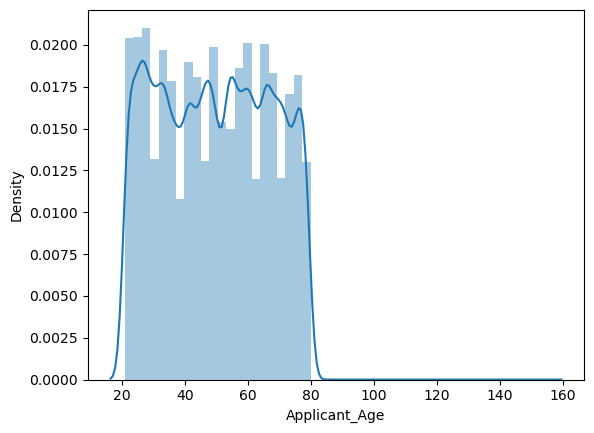

In [127]:
sns.distplot(x_sm["Applicant_Age"])

In [128]:
x_sm.skew()

Annual_Income                  0.003447
Applicant_Age                  0.016958
Work_Experience                0.001699
Marital_Status                -2.758924
House_Ownership               -4.114541
Car_Ownership                  1.027775
Occupation                    -0.041937
Residence_State                0.018989
Years_in_Current_Employment    0.268943
Years_in_Current_Residence     0.017786
dtype: float64

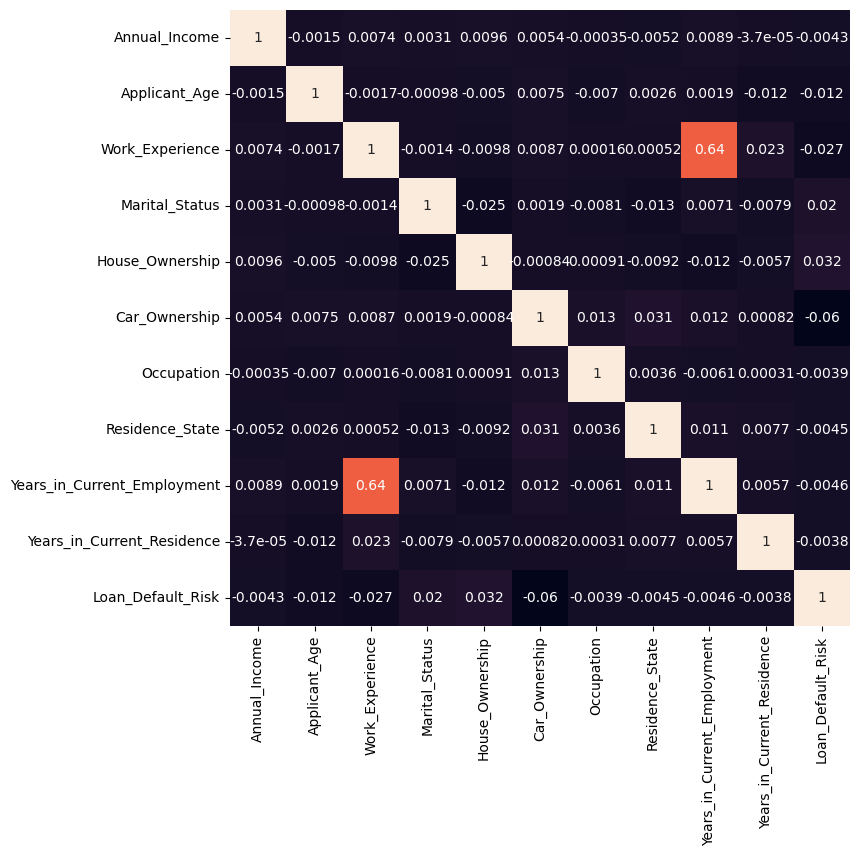

In [129]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 8)) 
sns.heatmap(data.corr() , 
           annot=True, 
           cbar=False) 
plt.show()

# Train test split

In [130]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=90)

In [131]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((139204, 10), (34802, 10), (139204,), (34802,))

# Logistic regression

In [132]:
lg.fit(x1_train,y1_train)

LogisticRegression()

In [133]:
lg_p1=lg.predict(x1_test)
lg_p1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [134]:
pred_prob1=lg.predict_proba(x1_test)
pred_prob1

array([[0.50152285, 0.49847715],
       [0.50003785, 0.49996215],
       [0.50067215, 0.49932785],
       ...,
       [0.50100418, 0.49899582],
       [0.50052793, 0.49947207],
       [0.50062679, 0.49937321]])

In [135]:
lg_m1=confusion_matrix(lg_p1,y1_test)
lg_m1

array([[17461, 17341],
       [    0,     0]], dtype=int64)

In [136]:
lg_acc1=lg_m1.diagonal().sum()/lg_m1.sum()*100
lg_acc1

50.1724038848342

In [137]:
lg_tpr1=1
lg_fpr1=1
lg_sp1=0
lg_pr1=0.5
lg_f11=0.666

In [138]:
print(classification_report(lg_p1,y1_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67     34802
           1       0.00      0.00      0.00         0

    accuracy                           0.50     34802
   macro avg       0.50      0.25      0.33     34802
weighted avg       1.00      0.50      0.67     34802



In [139]:
df1=pd.DataFrame(pred_prob1)
df1

,0,1
0,0.501523,0.498477
1,0.500038,0.499962
2,0.500672,0.499328
3,0.500911,0.499089
4,0.500860,0.499140
...,...,...
34797,0.500121,0.499879
34798,0.501407,0.498593
34799,0.501004,0.498996
34800,0.500528,0.499472


In [140]:
fpr1,tpr1,threshold1=roc_curve(y1_test,df1.iloc[:,1])
fpr1

array([0.00000000e+00, 1.14540977e-04, 2.29081954e-04, ...,
       9.99713648e-01, 9.99942730e-01, 1.00000000e+00])

In [141]:
tpr1

array([0.      , 0.      , 0.001038, ..., 1.      , 1.      , 1.      ])

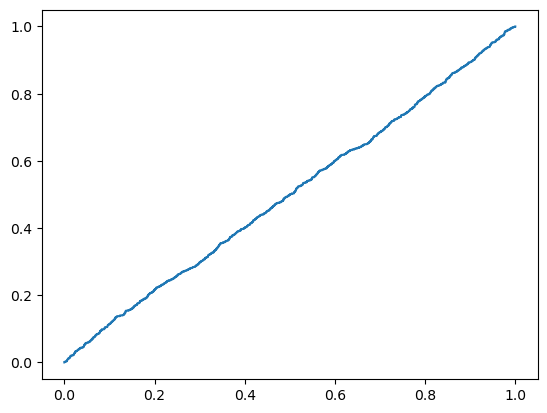

In [142]:
plt.plot(fpr1,tpr1)

In [143]:
#PRC

In [144]:
precision1,recall1,threshold1=precision_recall_curve(y1_test,df1.iloc[:,1])

In [145]:
precision1

array([0.49827596, 0.49829028, 0.49834756, ..., 0.81818182, 0.        ,
       1.        ])

In [146]:
recall1

array([1.      , 1.      , 1.      , ..., 0.001038, 0.      , 0.      ])

Text(0.5, 1.0, 'PRC-CURVE1')

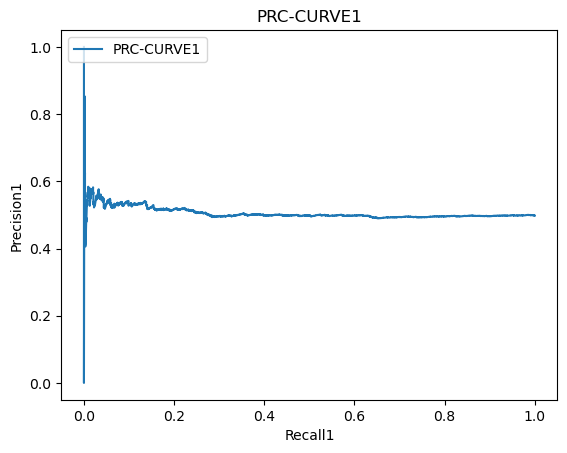

In [147]:
plt.plot(recall1,precision1,label="PRC-CURVE1")
plt.xlabel("Recall1")
plt.ylabel("Precision1")
plt.legend(loc="upper left")
plt.title("PRC-CURVE1")

# Decision tree

In [148]:
dt=DecisionTreeClassifier()

In [149]:
dt.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [150]:
dt_p1=dt.predict(x1_test)
dt_p1

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [151]:
dt_m1=confusion_matrix(dt_p1,y1_test)
dt_m1

array([[16096,    19],
       [ 1365, 17322]], dtype=int64)

In [152]:
dt_acc1=dt_m1.diagonal().sum()/dt_m1.sum()*100
dt_acc1

96.023217056491

In [153]:
dt_tpr1=0.921
dt_fpr1=0.001
dt_sp1=0.998
dt_pr1=0.998
dt_f11=0.957

In [154]:
dt.feature_importances_

array([0.25502161, 0.1624587 , 0.10093822, 0.02155803, 0.01707769,
       0.01068955, 0.16726304, 0.12008484, 0.08349128, 0.06141705])

In [155]:
dt2=pd.DataFrame({"importances":list(dt.feature_importances_),"columns":list(x)})
dt2

,importances,columns
0,0.255022,Annual_Income
1,0.162459,Applicant_Age
2,0.100938,Work_Experience
3,0.021558,Marital_Status
4,0.017078,House_Ownership
5,0.010690,Car_Ownership
6,0.167263,Occupation
7,0.120085,Residence_State
8,0.083491,Years_in_Current_Employment
9,0.061417,Years_in_Current_Residence


In [156]:
print(classification_report(dt_p1,y1_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     16115
           1       1.00      0.93      0.96     18687

    accuracy                           0.96     34802
   macro avg       0.96      0.96      0.96     34802
weighted avg       0.96      0.96      0.96     34802



In [157]:
#acc=95.98
#tpr=0.92
#fpr=0.00098
#precision=0.998
#f1 score=0.957

In [158]:
roc2=roc_auc_score(dt_p1,y1_test)
roc2

0.9628877707969395

In [159]:
dt_df1=pd.DataFrame(dt_p1)
dt_df1

,0
0,1
1,0
2,0
3,0
4,1
...,...
34797,1
34798,0
34799,1
34800,1


In [160]:
fpr2,tpr2,threshold2=roc_curve(y1_test,dt_df1)
fpr2

array([0.        , 0.07817422, 1.        ])

In [161]:
tpr2

array([0.        , 0.99890433, 1.        ])

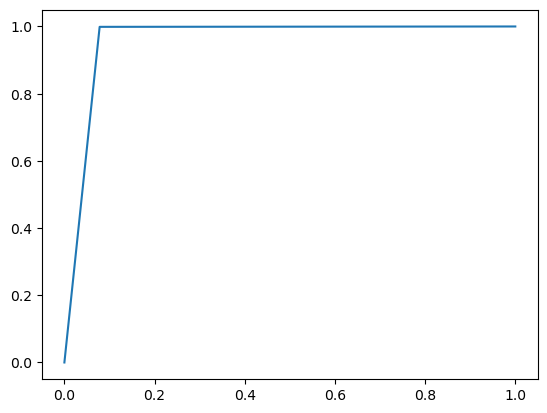

In [162]:
plt.plot(fpr2,tpr2)

In [163]:
#PRC

In [164]:
precision2,recall2,threshold2=precision_recall_curve(y1_test,dt_df1)
precision

array([0.1292    , 0.70637027, 1.        ])

In [165]:
recall2

array([1.        , 0.99890433, 0.        ])

Text(0.5, 1.0, 'PRC-CURVE2')

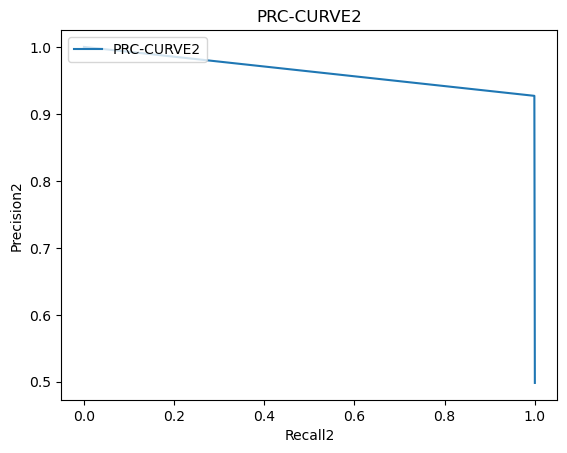

In [166]:
plt.plot(recall2,precision2,label="PRC-CURVE2")
plt.xlabel("Recall2")
plt.ylabel("Precision2")
plt.legend(loc="upper left")
plt.title("PRC-CURVE2")

# Random forest

In [167]:
rf=RandomForestClassifier()

In [168]:
rf.fit(x1_train,y1_train)

RandomForestClassifier()

In [169]:
rf_p1=rf.predict(x1_test)
rf_p1

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [170]:
rf_m1=confusion_matrix(rf_p1,y1_test)
rf_m1

array([[16096,    22],
       [ 1365, 17319]], dtype=int64)

In [171]:
rf_acc1=rf_m1.diagonal().sum()/rf_m1.sum()*100
rf_acc1

96.01459686224929

In [172]:
rf_tpr1=0.921
rf_fpr1=0.001
rf_sp1=0.998
rf_pr1=0.998
rf_f11=0.957

In [173]:
print(classification_report(rf_p1,y1_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     16118
           1       1.00      0.93      0.96     18684

    accuracy                           0.96     34802
   macro avg       0.96      0.96      0.96     34802
weighted avg       0.96      0.96      0.96     34802



In [174]:
#acc=95.98
#tpr=0.923
#fpr=0.00115
#precision=0.998
#f1 score=0.958

# KNN

In [175]:
knn=KNeighborsClassifier()

In [176]:
knn.fit(x1_train,y1_train)

KNeighborsClassifier()

In [177]:
knn_p1=knn.predict(x1_test)

In [178]:
knn_m1=confusion_matrix(knn_p1,y1_test)
knn_m1

array([[16122,   138],
       [ 1339, 17203]], dtype=int64)

In [179]:
knn_acc1=knn_m1.diagonal().sum()/knn_m1.sum()*100
knn_acc1

95.75599103499799

In [180]:
knn_tpr1=0.923
knn_fpr1=0.010
knn_sp1=0.989
knn_pr1=0.989
knn_f11=0.954

In [181]:
print(classification_report(knn_p1,y1_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     16260
           1       0.99      0.93      0.96     18542

    accuracy                           0.96     34802
   macro avg       0.96      0.96      0.96     34802
weighted avg       0.96      0.96      0.96     34802



In [182]:
lst1=list()

In [183]:
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x1_train,y1_train)
    p1=knn.predict(x1_test)
    c1=confusion_matrix(p1,y1_test)
    acc1=c1.diagonal().sum()/c1.sum()*100
    lst1.append(acc1)

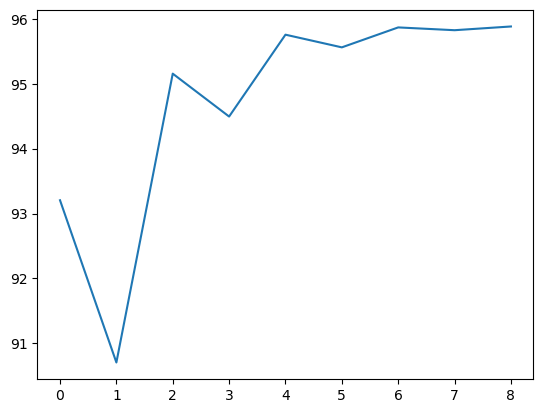

In [184]:
p2=plt.plot(lst1)

# Naive bayes


In [185]:
nb=MultinomialNB()

In [186]:
nb.fit(x1_train,y1_train)

MultinomialNB()

In [187]:
nb_p1=nb.predict(x1_test)

In [188]:
nb_m1=confusion_matrix(nb_p1,y1_test)
nb_m1

array([[9098, 8719],
       [8363, 8622]], dtype=int64)

In [189]:
nb_acc1=nb_m1.diagonal().sum()/nb_m1.sum()*100
nb_acc1

50.91661398770185

In [190]:
nb_tpr1=0.520
nb_fpr1=0.482
nb_sp1=0.517
nb_pr1=0.52
nb_f11=0.519

In [191]:
print(classification_report(nb_p1,y1_test))

              precision    recall  f1-score   support

           0       0.52      0.51      0.52     17817
           1       0.50      0.51      0.50     16985

    accuracy                           0.51     34802
   macro avg       0.51      0.51      0.51     34802
weighted avg       0.51      0.51      0.51     34802



# SVM

In [194]:
svc=SVC()

In [195]:
svc.fit(x1_train,y1_train)

SVC()

In [196]:
svc_p1=svc.predict(x1_test)

In [197]:
svc_m1=confusion_matrix(svc_p1,y1_test)
svc_m1

array([[11699, 11126],
       [ 5762,  6215]], dtype=int64)

In [198]:
svc_acc1=svc_m1.diagonal().sum()/svc_m1.sum()*100
svc_acc1

51.47405321533245

In [199]:
svc_tpr1=0.699
svc_fpr1=0.683
svc_sp1=0.316
svc_pr1=0.492
svc_f11=0.572

In [200]:
print(classification_report(svc_p1,y1_test))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58     22825
           1       0.36      0.52      0.42     11977

    accuracy                           0.51     34802
   macro avg       0.51      0.52      0.50     34802
weighted avg       0.56      0.51      0.53     34802



In [201]:
l8=["Logistic1","Decision_tree1","Random_forest1","KNN1", "Naive_bayes1","SVM"]
l9=[lg_acc1,dt_acc1,rf_acc1, knn_acc1, nb_acc1,svc_acc1 ]
l10=[lg_tpr1,dt_tpr1,rf_tpr1, knn_tpr1, nb_tpr1, svc_tpr1]
l11=[lg_fpr1,dt_fpr1,rf_fpr1, knn_fpr1, nb_fpr1, svc_fpr1]
l12=[lg_sp1,dt_sp1,rf_sp1, knn_sp1, nb_sp1, svc_sp1]
l13=[lg_pr1,dt_pr1,rf_pr1, knn_pr1, nb_pr1, svc_pr1]
l14=[lg_f11,dt_f11,rf_f11, knn_f11, nb_f11, svc_f11]

In [202]:
final1=pd.DataFrame({"Modelname1":l8,"Accuracy1":l9,"TPR1":l10,"FPR1":l11, "Specificity1":l12,"Precision1":l13,"F1-score1":l14})
final1

,Modelname1,Accuracy1,TPR1,FPR1,Specificity1,Precision1,F1-score1
0,Logistic1,50.172404,1.000,1.000,0.000,0.500,0.666
1,Decision_tree1,96.023217,0.921,0.001,0.998,0.998,0.957
2,Random_forest1,96.014597,0.921,0.001,0.998,0.998,0.957
3,KNN1,95.755991,0.923,0.010,0.989,0.989,0.954
4,Naive_bayes1,50.916614,0.520,0.482,0.517,0.520,0.519
5,SVM,51.474053,0.699,0.683,0.316,0.492,0.572


# XG boost regressor

In [203]:
xgb=XGBClassifier()

In [204]:
xgb.fit(x1_train,y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [205]:
xgb_p1=xgb.predict(x1_test)

In [206]:
xgb_m1=confusion_matrix(xgb_p1,y1_test)
xgb_m1

array([[15864,   321],
       [ 1597, 17020]], dtype=int64)

In [207]:
xgb_acc1=xgb_m1.diagonal().sum()/xgb_m1.sum()*100
xgb_acc1

94.48882248146658

In [208]:
xgb_tpr1=0.912
xgb_fpr1=0.015
xgb_sp1=0.984
xgb_pr1=0.983
xgb_f11=0.945

In [209]:
print(classification_report(xgb_p1,y1_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     16185
           1       0.98      0.91      0.95     18617

    accuracy                           0.94     34802
   macro avg       0.95      0.95      0.94     34802
weighted avg       0.95      0.94      0.94     34802



# Adaboost

In [210]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [211]:
adbo.fit(x1_train,y1_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [212]:
adb_p1=adbo.predict(x1_test)

In [213]:
adb_m1=confusion_matrix(adb_p1,y1_test)
adb_m1

array([[16096,    19],
       [ 1365, 17322]], dtype=int64)

In [214]:
adb_acc1=adb_m1.diagonal().sum()/adb_m1.sum()*100
adb_acc1

96.023217056491

In [215]:
adb_tpr1=0.921
adb_fpr1=0.001
adb_sp1=0.998
adb_pr1=0.998
adb_f11=0.957

In [216]:
print(classification_report(adb_p1,y1_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     16115
           1       1.00      0.93      0.96     18687

    accuracy                           0.96     34802
   macro avg       0.96      0.96      0.96     34802
weighted avg       0.96      0.96      0.96     34802



In [266]:
l8=["Logistic1","Decision_tree1","Random_forest1","KNN1", "Naive_bayes1","SVM1","XG Boost1", "Adaboost1"]
l9=[lg_acc1,dt_acc1,rf_acc1, knn_acc1, nb_acc1,svc_acc1,xgb_acc1, adb_acc1]
l10=[lg_tpr1,dt_tpr1,rf_tpr1, knn_tpr1, nb_tpr1, svc_tpr1, xgb_tpr1, adb_tpr1]
l11=[lg_fpr1,dt_fpr1,rf_fpr1, knn_fpr1, nb_fpr1, svc_fpr1, xgb_fpr1, adb_fpr1]
l12=[lg_sp1,dt_sp1,rf_sp1, knn_sp1, nb_sp1, svc_sp1, xgb_sp1, adb_sp1]
l13=[lg_pr1,dt_pr1,rf_pr1, knn_pr1, nb_pr1, svc_pr1, xgb_pr1, adb_pr1]
l14=[lg_f11,dt_f11,rf_f11, knn_f11, nb_f11, svc_f11, xgb_f11,adb_f11]

In [267]:
final_DF=pd.DataFrame({"Modelname1":l8,"Accuracy1":l9,"TPR1":l10,"FPR1":l11, "Specificity1":l12,"Precision1":l13,"F1-score1":l14})
final_DF

,Modelname1,Accuracy1,TPR1,FPR1,Specificity1,Precision1,F1-score1
0,Logistic1,50.172404,1.000,1.000,0.000,0.500,0.666
1,Decision_tree1,96.023217,0.921,0.001,0.998,0.998,0.957
2,Random_forest1,96.014597,0.921,0.001,0.998,0.998,0.957
3,KNN1,95.755991,0.923,0.010,0.989,0.989,0.954
4,Naive_bayes1,50.916614,0.520,0.482,0.517,0.520,0.519
5,SVM1,51.474053,0.699,0.683,0.316,0.492,0.572
6,XG Boost1,94.488822,0.912,0.015,0.984,0.983,0.945
7,Adaboost1,96.023217,0.921,0.001,0.998,0.998,0.957


# FEATURE SELECTION

In [246]:
cst=SelectKBest(score_func=chi2,k="all").fit(x1_train, y1_train)

In [249]:
s_f=pd.DataFrame({"feature":list(x1_train.columns),"score":cst.scores_})
s_f.sort_values(by="score",ascending=False)

,feature,score
0,Annual_Income,7.405383e+06
1,Applicant_Age,9.889073e+02
2,Work_Experience,9.632831e+02
5,Car_Ownership,9.386900e+02
6,Occupation,8.653162e+01
4,House_Ownership,2.370300e+01
8,Years_in_Current_Employment,2.140484e+01
3,Marital_Status,1.465310e+01
7,Residence_State,1.344592e+01
9,Years_in_Current_Residence,1.468863e+00


In [252]:
x_train_chi=cst.transform(x1_train)
x_test_chi=cst.transform(x1_test)

In [253]:
x_train_chi[0:3]

array([[5563521,      26,       4,       1,       2,       0,       1,
             17,       4,      13],
       [ 358137,      21,      14,       1,       2,       0,      28,
             23,       3,      12],
       [7475587,      26,      16,       1,       2,       1,      44,
              2,       7,      13]], dtype=int64)

In [254]:
rf_chi_model=rf.fit(x_train_chi, y1_train)

In [255]:
rfs_p=rf_chi_model.predict(x1_test)
rfs_p

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [256]:
rfs_m=confusion_matrix(rfs_p, y1_test)
rfs_m

array([[16095,    22],
       [ 1366, 17319]], dtype=int64)

In [257]:
fs_acc=rfs_m.diagonal().sum()/rfs_m.sum()*100
fs_acc

96.01172346416872

In [262]:
fs_tpr=0.921
fs_fpr=0.001
fs_sp=0.998
fs_pr=0.998
fs_f1=0.943

In [263]:
print(classification_report(rfs_p,y1_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     16117
           1       1.00      0.93      0.96     18685

    accuracy                           0.96     34802
   macro avg       0.96      0.96      0.96     34802
weighted avg       0.96      0.96      0.96     34802



In [264]:
l8=["Logistic1","Decision_tree1","Random_forest1","KNN1", "Naive_bayes1","SVM1","XG Boost1", "Adaboost1","Feature selection"]
l9=[lg_acc1,dt_acc1,rf_acc1, knn_acc1, nb_acc1,svc_acc1,xgb_acc1, adb_acc1, fs_acc  ]
l10=[lg_tpr1,dt_tpr1,rf_tpr1, knn_tpr1, nb_tpr1, svc_tpr1, xgb_tpr1, adb_tpr1, fs_tpr]
l11=[lg_fpr1,dt_fpr1,rf_fpr1, knn_fpr1, nb_fpr1, svc_fpr1, xgb_fpr1, adb_fpr1, fs_fpr]
l12=[lg_sp1,dt_sp1,rf_sp1, knn_sp1, nb_sp1, svc_sp1, xgb_sp1, adb_sp1, fs_sp]
l13=[lg_pr1,dt_pr1,rf_pr1, knn_pr1, nb_pr1, svc_pr1, xgb_pr1, adb_pr1, fs_pr]
l14=[lg_f11,dt_f11,rf_f11, knn_f11, nb_f11, svc_f11, xgb_f11,adb_f11, fs_f1]

In [265]:
final_DF=pd.DataFrame({"Modelname1":l8,"Accuracy1":l9,"TPR1":l10,"FPR1":l11, "Specificity1":l12,"Precision1":l13,"F1-score1":l14})
final_DF

,Modelname1,Accuracy1,TPR1,FPR1,Specificity1,Precision1,F1-score1
0,Logistic1,50.172404,1.000,1.000,0.000,0.500,0.666
1,Decision_tree1,96.023217,0.921,0.001,0.998,0.998,0.957
2,Random_forest1,96.014597,0.921,0.001,0.998,0.998,0.957
3,KNN1,95.755991,0.923,0.010,0.989,0.989,0.954
4,Naive_bayes1,50.916614,0.520,0.482,0.517,0.520,0.519
5,SVM1,51.474053,0.699,0.683,0.316,0.492,0.572
6,XG Boost1,94.488822,0.912,0.015,0.984,0.983,0.945
7,Adaboost1,96.023217,0.921,0.001,0.998,0.998,0.957
8,Feature selection,96.011723,0.921,0.001,0.998,0.998,0.943
